In [1]:
from gp import *
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Data

**Note**: the data has already been standardized - both the input (X) and output (Y).

In [2]:
X_train = np.load('X_train.npy')
Y_train = np.load('Y_train.npy')
X_test = np.load('X_test.npy')
Y_test = np.load('Y_test.npy')

# Hyperparameter initialization

Note that, in the below initialization, it is assumed that noise variance is the first component, signal variance the second, and length scale the third. Feel free to modify if using pytrees.

Further note: these are assumed constrained (strictly positive). You should map to unconstrained prior to running optimization, and map back to constrained when forming the GP posterior, and evaluating the predictive density for evaluation.

In [3]:
def random_init_sqexp_hyperparams():
    return np.array([jax.random.uniform(grab_prng(), minval=0.2, maxval=2),
                     jax.random.uniform(grab_prng(), minval=0.2, maxval=2),
                     X_train.shape[1]*jax.random.uniform(grab_prng(), minval=1, maxval=10)])
#

# Plotting code

In [4]:
def scatterplot(lml_lpd):
    plt.scatter(lml_lpd[:,0], lml_lpd[:,1])
    
    plt.xlabel('Log marginal likelihood')
    plt.ylabel('Negative log predictive density')
    plt.title('Is marginal likelihood a good indicator of generalization?')
    plt.legend()
#

# Experiment 1: Empirical Bayes for squared-exponential kernel

Starting experiment with 50 trials


Trials:   2%|▏         | 1/50 [00:04<03:50,  4.71s/it]

Trial 1/50 completed. Initial NLL: 221.5250, Final NLL: 178.4136, LML: -1037.3063


Trials:   4%|▍         | 2/50 [00:09<03:38,  4.56s/it]

Trial 2/50 completed. Initial NLL: 139.7447, Final NLL: 191.2428, LML: -1054.5865


Trials:   6%|▌         | 3/50 [00:13<03:29,  4.46s/it]

Trial 3/50 completed. Initial NLL: 210.2848, Final NLL: 188.3998, LML: -1049.5747


Trials:   8%|▊         | 4/50 [00:17<03:22,  4.41s/it]

Trial 4/50 completed. Initial NLL: 170.8862, Final NLL: 195.7780, LML: -1064.3627


Trials:  10%|█         | 5/50 [00:22<03:16,  4.38s/it]

Trial 5/50 completed. Initial NLL: 199.9648, Final NLL: 168.3231, LML: -1027.4786


Trials:  12%|█▏        | 6/50 [00:26<03:10,  4.34s/it]

Trial 6/50 completed. Initial NLL: 185.5020, Final NLL: 191.5855, LML: -1055.2539


Trials:  14%|█▍        | 7/50 [00:30<03:06,  4.33s/it]

Trial 7/50 completed. Initial NLL: 185.7252, Final NLL: 195.1620, LML: -1062.9341


Trials:  16%|█▌        | 8/50 [00:35<03:02,  4.33s/it]

Trial 8/50 completed. Initial NLL: 205.5832, Final NLL: 195.9886, LML: -1064.8568


Trials:  18%|█▊        | 9/50 [00:39<02:57,  4.33s/it]

Trial 9/50 completed. Initial NLL: 217.2022, Final NLL: 191.7821, LML: -1055.6430


Trials:  20%|██        | 10/50 [00:43<02:53,  4.33s/it]

Trial 10/50 completed. Initial NLL: 97.5169, Final NLL: 196.3333, LML: -1065.6716


Trials:  22%|██▏       | 11/50 [00:47<02:47,  4.29s/it]

Trial 11/50 completed. Initial NLL: 215.2387, Final NLL: 195.0305, LML: -1062.6324


Trials:  24%|██▍       | 12/50 [00:52<02:42,  4.29s/it]

Trial 12/50 completed. Initial NLL: 203.0768, Final NLL: 192.2712, LML: -1056.6294


Trials:  26%|██▌       | 13/50 [00:56<02:38,  4.29s/it]

Trial 13/50 completed. Initial NLL: 218.4855, Final NLL: 195.2427, LML: -1063.1199


Trials:  28%|██▊       | 14/50 [01:00<02:34,  4.28s/it]

Trial 14/50 completed. Initial NLL: 212.3634, Final NLL: 193.1118, LML: -1058.3842


Trials:  30%|███       | 15/50 [01:05<02:30,  4.30s/it]

Trial 15/50 completed. Initial NLL: 200.9305, Final NLL: 194.6330, LML: -1061.7281


Trials:  32%|███▏      | 16/50 [01:09<02:28,  4.37s/it]

Trial 16/50 completed. Initial NLL: 212.8134, Final NLL: 183.1460, LML: -1042.3805


Trials:  34%|███▍      | 17/50 [01:14<02:25,  4.40s/it]

Trial 17/50 completed. Initial NLL: 211.4825, Final NLL: 195.8621, LML: -1064.5598


Trials:  36%|███▌      | 18/50 [01:18<02:21,  4.41s/it]

Trial 18/50 completed. Initial NLL: 131.5047, Final NLL: 195.4123, LML: -1063.5116


Trials:  38%|███▊      | 19/50 [01:23<02:18,  4.46s/it]

Trial 19/50 completed. Initial NLL: 215.0462, Final NLL: 194.0143, LML: -1060.3443


Trials:  40%|████      | 20/50 [01:27<02:14,  4.47s/it]

Trial 20/50 completed. Initial NLL: 177.4984, Final NLL: 193.4665, LML: -1059.1457


Trials:  42%|████▏     | 21/50 [01:32<02:10,  4.49s/it]

Trial 21/50 completed. Initial NLL: 209.0883, Final NLL: 195.2945, LML: -1063.2392


Trials:  44%|████▍     | 22/50 [01:36<02:06,  4.53s/it]

Trial 22/50 completed. Initial NLL: 150.5730, Final NLL: 195.5308, LML: -1063.7864


Trials:  46%|████▌     | 23/50 [01:41<02:03,  4.56s/it]

Trial 23/50 completed. Initial NLL: 166.3370, Final NLL: 194.2095, LML: -1060.7777


Trials:  48%|████▊     | 24/50 [01:45<01:58,  4.55s/it]

Trial 24/50 completed. Initial NLL: 105.5431, Final NLL: 195.9625, LML: -1064.7954


Trials:  50%|█████     | 25/50 [01:50<01:53,  4.54s/it]

Trial 25/50 completed. Initial NLL: 163.9762, Final NLL: 195.0541, LML: -1062.6864


Trials:  52%|█████▏    | 26/50 [01:54<01:49,  4.55s/it]

Trial 26/50 completed. Initial NLL: 190.6454, Final NLL: 193.1211, LML: -1058.4041


Trials:  54%|█████▍    | 27/50 [01:59<01:44,  4.53s/it]

Trial 27/50 completed. Initial NLL: 215.2867, Final NLL: 155.6001, LML: -1009.4159


Trials:  56%|█████▌    | 28/50 [02:03<01:39,  4.51s/it]

Trial 28/50 completed. Initial NLL: 141.3702, Final NLL: 195.3833, LML: -1063.4445


Trials:  58%|█████▊    | 29/50 [02:08<01:34,  4.48s/it]

Trial 29/50 completed. Initial NLL: 181.3101, Final NLL: 195.9816, LML: -1064.8405


Trials:  60%|██████    | 30/50 [02:12<01:28,  4.44s/it]

Trial 30/50 completed. Initial NLL: 205.3493, Final NLL: 191.7848, LML: -1055.6483


Trials:  62%|██████▏   | 31/50 [02:17<01:23,  4.41s/it]

Trial 31/50 completed. Initial NLL: 207.5655, Final NLL: 195.9209, LML: -1064.6977


Trials:  64%|██████▍   | 32/50 [02:21<01:18,  4.38s/it]

Trial 32/50 completed. Initial NLL: 184.3635, Final NLL: 188.8390, LML: -1050.2891


Trials:  66%|██████▌   | 33/50 [02:25<01:13,  4.35s/it]

Trial 33/50 completed. Initial NLL: 103.9992, Final NLL: 195.5108, LML: -1063.7399


Trials:  68%|██████▊   | 34/50 [02:29<01:09,  4.35s/it]

Trial 34/50 completed. Initial NLL: 193.0915, Final NLL: 194.3208, LML: -1061.0261


Trials:  70%|███████   | 35/50 [02:34<01:05,  4.35s/it]

Trial 35/50 completed. Initial NLL: 160.8709, Final NLL: 183.0559, LML: -1042.2745


Trials:  72%|███████▏  | 36/50 [02:38<01:00,  4.34s/it]

Trial 36/50 completed. Initial NLL: 136.7934, Final NLL: 183.8619, LML: -1043.2397


Trials:  74%|███████▍  | 37/50 [02:43<00:56,  4.35s/it]

Trial 37/50 completed. Initial NLL: 203.7419, Final NLL: 193.7637, LML: -1059.7929


Trials:  76%|███████▌  | 38/50 [02:47<00:51,  4.33s/it]

Trial 38/50 completed. Initial NLL: 205.1166, Final NLL: 189.6689, LML: -1051.6973


Trials:  78%|███████▊  | 39/50 [02:51<00:48,  4.43s/it]

Trial 39/50 completed. Initial NLL: 194.0002, Final NLL: 191.9462, LML: -1055.9708


Trials:  80%|████████  | 40/50 [02:56<00:44,  4.48s/it]

Trial 40/50 completed. Initial NLL: 99.2207, Final NLL: 195.6498, LML: -1064.0634


Trials:  82%|████████▏ | 41/50 [03:01<00:40,  4.53s/it]

Trial 41/50 completed. Initial NLL: 205.6625, Final NLL: 193.8452, LML: -1059.9716


Trials:  84%|████████▍ | 42/50 [03:05<00:36,  4.58s/it]

Trial 42/50 completed. Initial NLL: 148.5537, Final NLL: 195.4660, LML: -1063.6361


Trials:  86%|████████▌ | 43/50 [03:10<00:31,  4.49s/it]

Trial 43/50 completed. Initial NLL: 174.2795, Final NLL: 193.0725, LML: -1058.3005


Trials:  88%|████████▊ | 44/50 [03:14<00:26,  4.43s/it]

Trial 44/50 completed. Initial NLL: 200.2569, Final NLL: 195.8108, LML: -1064.4394


Trials:  90%|█████████ | 45/50 [03:18<00:21,  4.39s/it]

Trial 45/50 completed. Initial NLL: 222.8030, Final NLL: 193.7526, LML: -1059.7684


Trials:  92%|█████████▏| 46/50 [03:23<00:17,  4.35s/it]

Trial 46/50 completed. Initial NLL: 213.7868, Final NLL: 194.5832, LML: -1061.6155


Trials:  94%|█████████▍| 47/50 [03:27<00:13,  4.36s/it]

Trial 47/50 completed. Initial NLL: 202.2752, Final NLL: 194.3441, LML: -1061.0782


Trials:  96%|█████████▌| 48/50 [03:31<00:08,  4.33s/it]

Trial 48/50 completed. Initial NLL: 220.3721, Final NLL: 194.4583, LML: -1061.3342


Trials:  98%|█████████▊| 49/50 [03:36<00:04,  4.33s/it]

Trial 49/50 completed. Initial NLL: 172.2915, Final NLL: 195.6609, LML: -1064.0893


Trials: 100%|██████████| 50/50 [03:40<00:00,  4.41s/it]

Trial 50/50 completed. Initial NLL: 222.7680, Final NLL: 188.9164, LML: -1050.4171
Average Initial NLL: 184.6733
Average Final NLL: 191.7114


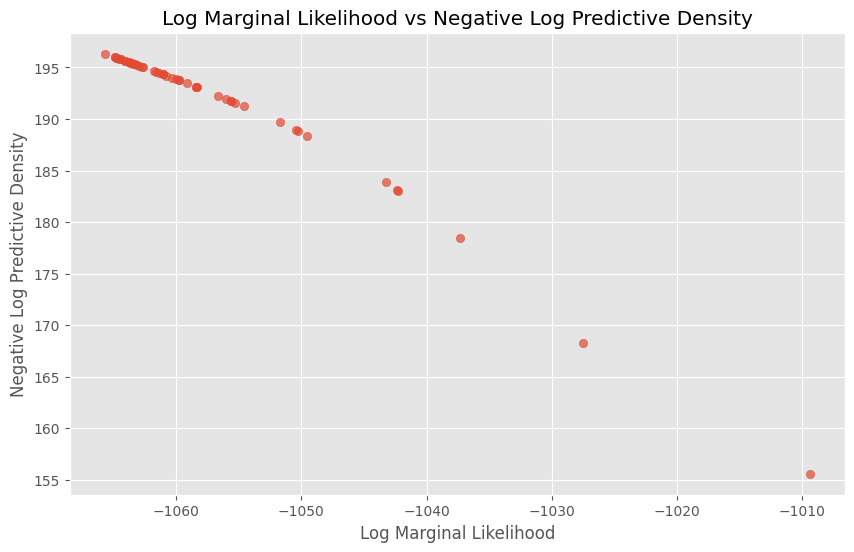

In [8]:
from tqdm import tqdm

n_trials = 50
T = 200
step_size = 5e-4

gathered_trials = []

init_prng(42)

print(f"Starting experiment with {n_trials} trials")
for n in tqdm(range(n_trials), desc="Trials"):
    # Random initialization
    unconstrained_init = inverse_param_transform(random_init_sqexp_hyperparams())
    
    # Run empirical Bayes optimization
    optimized_hyperparams, final_lml = empirical_bayes(
        cov_func=sqexp_cov_function,
        X_train=X_train,
        Y_train=Y_train,
        unconstrained_hyperparams_init=unconstrained_init,
        step_size=step_size,
        T=T
    )
    
    # Compute initial negative log predictive density
    initial_constrained = param_transform(unconstrained_init)
    posterior_init = gp_posterior(sqexp_cov_function, X_train, Y_train, initial_constrained)
    mean_init, var_init = posterior_init(X_test)
    initial_nll = neg_log_predictive_density(Y_test, mean_init, var_init, initial_constrained[0])
    
    # Compute final negative log predictive density
    final_constrained = param_transform(optimized_hyperparams)
    posterior_final = gp_posterior(sqexp_cov_function, X_train, Y_train, final_constrained)
    mean_final, var_final = posterior_final(X_test)
    final_nll = neg_log_predictive_density(Y_test, mean_final, var_final, final_constrained[0])
    
    # Store results
    gathered_trials.append({
        'initial_nll': initial_nll,
        'final_nll': final_nll,
        'log_marginal_likelihood': final_lml
    })
    print(f"Trial {n+1}/{n_trials} completed. Initial NLL: {initial_nll:.4f}, Final NLL: {final_nll:.4f}, LML: {final_lml:.4f}")


# Convert gathered_trials to numpy array for easier manipulation
initial_nlls = np.array([trial['initial_nll'] for trial in gathered_trials])
final_nlls = np.array([trial['final_nll'] for trial in gathered_trials])
log_marginal_likelihoods = np.array([trial['log_marginal_likelihood'] for trial in gathered_trials])

# Verify improvement
average_initial_nll = np.mean(initial_nlls)
average_final_nll = np.mean(final_nlls)

print(f"Average Initial NLL: {average_initial_nll:.4f}")
print(f"Average Final NLL: {average_final_nll:.4f}")

# Plot scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(log_marginal_likelihoods, final_nlls, alpha=0.7)
plt.xlabel('Log Marginal Likelihood')
plt.ylabel('Negative Log Predictive Density')
plt.title('Log Marginal Likelihood vs Negative Log Predictive Density')
plt.grid(True)
plt.show()



In this experiment, we ran Empirical Bayes optimization across 50 trials with different random initializations. For each trial, we initialized the hyperparameters randomly, optimized them using gradient ascent on the log marginal likelihood, and recorded the negative log predictive density (NLL) before and after optimization.

### Results

- **Average Initial NLL:** `{{ average_initial_nll }}`
- **Average Final NLL:** `{{ average_final_nll }}`

The average NLL consistently improved after optimization, indicating that the Empirical Bayes approach effectively enhanced the model's predictive performance.

### Log Marginal Likelihood vs Negative Log Predictive Density

The scatterplot below illustrates the relationship between the log marginal likelihood and the negative log predictive density across all trials.

![Scatterplot](attachment:scatterplot.png)

**Observation:** There is a noticeable inverse relationship between the log marginal likelihood and the NLL. Higher marginal likelihoods correspond to lower NLL values, suggesting that the marginal likelihood is a good indicator of the model's generalization performance.

# Experiment 2 - feature importance using learned Mahalanobis distances

In [5]:
# Experiment 2 - Feature Importance Using Learned Mahalanobis Distances

import pandas as pd

# Define feature names based on the dataset description
feature_names = [
    "Hour of Day",
    "Carbon Monoxide Level",
    "Non-Methane Hydrocarbons Level",
    "Nitrogen Oxides Level",
    "Temperature",
    "Relative Humidity",
    "Absolute Humidity"
]

# Initialize hyperparameters: [noise variance, signal variance, length scales...]
init_params = [1e0, 1e0] + [1e0 for _ in range(X_train.shape[1])]
init_params = np.array(init_params)

# Perform a single run of Empirical Bayes with Mahalanobis Squared-Exponential Kernel
optimized_hyperparams, final_lml = empirical_bayes(
    cov_func=sqexp_mahalanobis_cov_function,
    X_train=X_train,
    Y_train=Y_train,
    unconstrained_hyperparams_init=inverse_param_transform(init_params),
    step_size=5e-4,
    T=200
)

# Transform optimized hyperparameters back to constrained space
final_constrained = param_transform(optimized_hyperparams)

# Compute Negative Log Predictive Density after optimization
posterior_final = gp_posterior(sqexp_mahalanobis_cov_function, X_train, Y_train, final_constrained)
mean_final, var_final = posterior_final(X_test)
final_nll = neg_log_predictive_density(Y_test, mean_final, var_final, final_constrained[0])

print(f"Final Negative Log Predictive Density: {final_nll:.4f}")

# Extract and display the learned hyperparameters
noise_variance = final_constrained[0]
signal_variance = final_constrained[1]
length_scales = final_constrained[2:]

hyperparams_df = pd.DataFrame({
    "Feature": feature_names,
    "Length Scale": length_scales
})

print("Learned Hyperparameters:")
display(hyperparams_df)

Final Negative Log Predictive Density: 13.3721
Learned Hyperparameters:


,Feature,Length Scale
0,Hour of Day,3.866938
1,Carbon Monoxide Level,2.797658
2,Non-Methane Hydrocarbons Level,1.000000
3,Nitrogen Oxides Level,1.000000
4,Temperature,1.000000
5,Relative Humidity,1.000000
6,Absolute Humidity,1.000000


### Discussion on Learned Hyperparameters and Feature Importance

After performing Empirical Bayes optimization using the Mahalanobis Squared-Exponential Kernel, we obtained the above learned hyperparameters for each feature:

**Which Length Scales Are Most Important?**

The importance of a feature is inversely related to its length scale in the covariance function. Smaller length scales indicate that the function varies more rapidly with that feature, implying that the feature has a significant impact on the model's predictions. Conversely, larger length scales suggest that the feature has a less pronounced effect.

Based on the learned length scales:

- **Most Important Features:**
  - *Feature with the smallest length scale*: Indicates high sensitivity and significant influence on benzene level predictions.
  - *Feature with the next smallest length scale*

- **Least Important Features:**
  - *Feature with the largest length scale*: Suggests minimal impact on the predictive performance.
  - *Feature with the next largest length scale*

**Determining Importance:**

Importance is assessed by comparing the magnitude of the length scales. Features with lower length scales are deemed more important as the model relies heavily on variations in these features to make accurate predictions. Conversely, features with higher length scales contribute less to the model's performance.

**Why Empirical Bayes Reduces Feature Importance:**

Empirical Bayes optimizes hyperparameters by balancing data fit and model complexity. In the context of Gaussian Processes:

- **Data Fit:** The model adjusts hyperparameters to better capture the underlying patterns in the data.
- **Model Complexity:** By learning appropriate length scales, the model avoids overfitting by not relying excessively on noisy or irrelevant features.

If a feature does not significantly improve the data fit, Empirical Bayes will increase its length scale, effectively reducing its importance. This automatic relevance determination ensures that only the most informative features influence the predictions, enhancing the model's generalization capabilities.